### Importing Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading dataset

In [137]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\pga24\ML\amazon_reviews.csv")

In [138]:
df.shape

(4915, 11)

In [139]:
df.head()

,Reviewer_Name,overall_rating,Review_Text,Review_Year,Day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013,513,0,0,0,0,0.0,0.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer_Name         4914 non-null   object 
 1   overall_rating        4915 non-null   int64  
 2   Review_Text           4914 non-null   object 
 3   Review_Year           4915 non-null   int64  
 4   Day_diff              4915 non-null   int64  
 5   helpful_yes           4915 non-null   int64  
 6   helpful_no            4915 non-null   int64  
 7   total_vote            4915 non-null   int64  
 8   score_pos_neg_diff    4915 non-null   int64  
 9   score_average_rating  4915 non-null   float64
 10  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 422.5+ KB


### Data Preprocessing

In [141]:
df.describe()

,overall_rating,Review_Year,Day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,4.587589,2013.251272,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,0.996845,0.626163,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,1.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,5.000000,2013.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,2013.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2014.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2014.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [142]:
# Checking for missing values 

df.isnull().sum()

Reviewer_Name           1
overall_rating          0
Review_Text             1
Review_Year             0
Day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [143]:
df = df.dropna()

In [144]:
df.isnull().sum()

Reviewer_Name           0
overall_rating          0
Review_Text             0
Review_Year             0
Day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [145]:
## dropping unwanted cloumns from dataset

df.drop('helpful_yes', axis = 1, inplace = True)
df.drop('helpful_no', axis = 1, inplace = True)
df.drop('total_vote', axis = 1, inplace = True)
df.drop('score_pos_neg_diff', axis = 1, inplace = True)
df.drop('score_average_rating', axis = 1, inplace = True)
df.drop('wilson_lower_bound', axis = 1, inplace = True)

### Data Visualization 

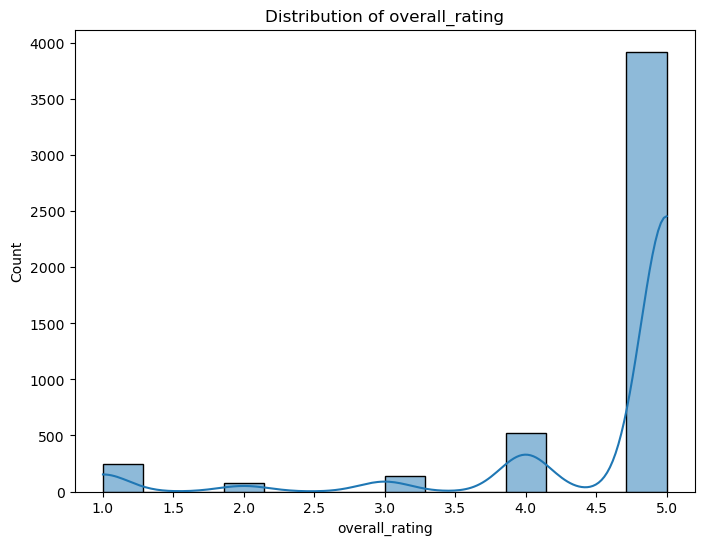

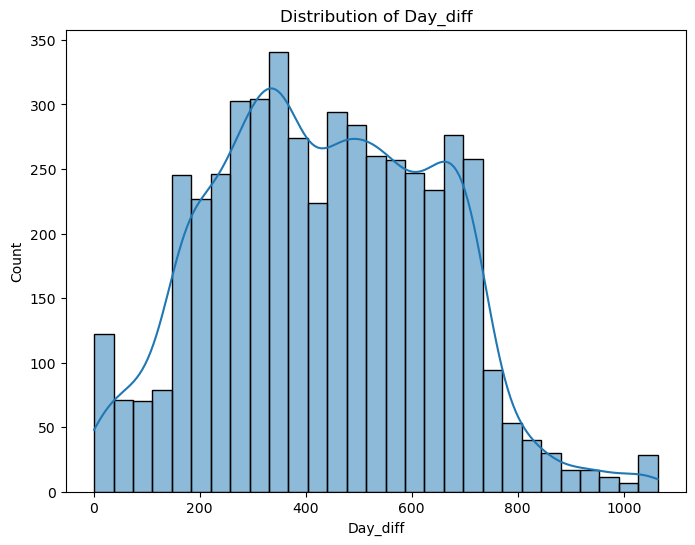

In [146]:
numerical_cols = ['overall_rating', 'Day_diff']

# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()

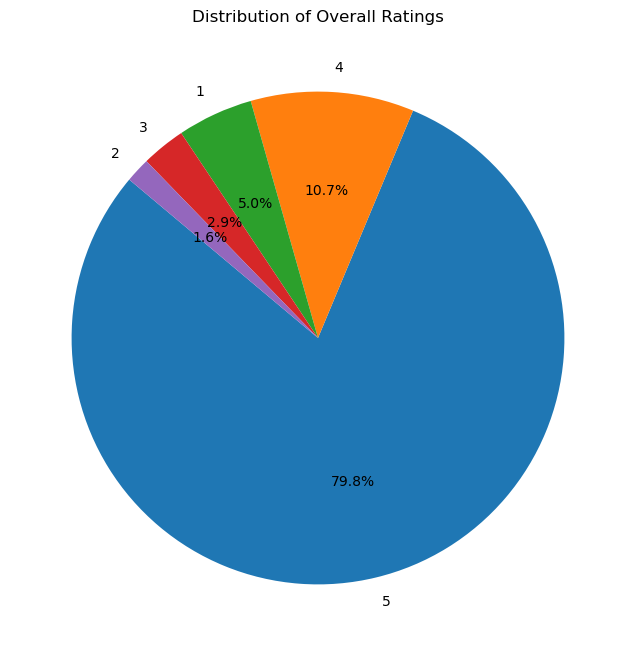

In [147]:
rating_counts = df['overall_rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Overall Ratings")
plt.show()


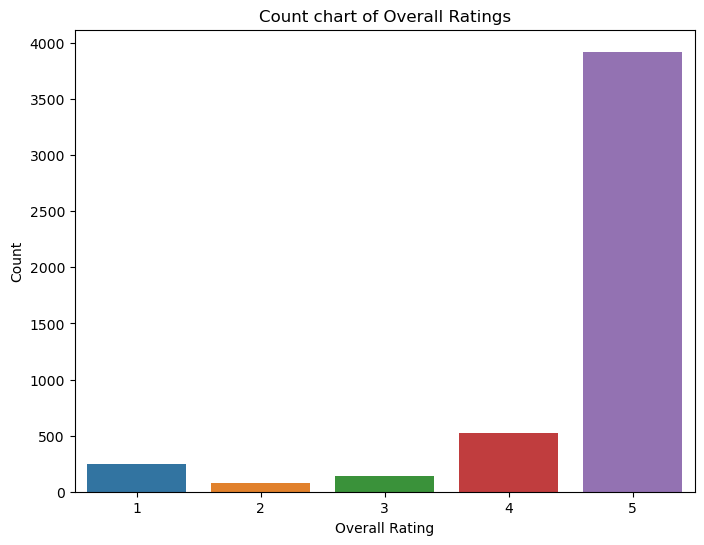

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(x='overall_rating', data=df)
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Count chart of Overall Ratings')
plt.show()

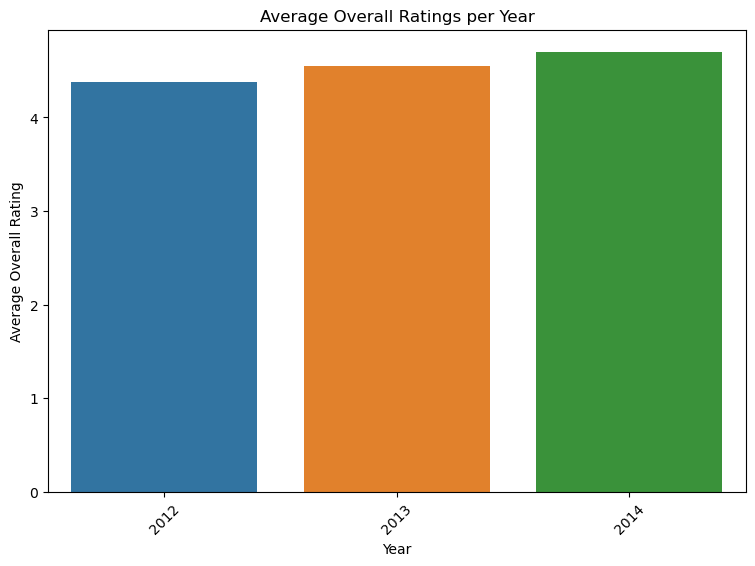

In [149]:
average_ratings_per_year = df.groupby('Review_Year')['overall_rating'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Review_Year', y='overall_rating', data=average_ratings_per_year)
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Ratings per Year')
plt.xticks(rotation=45)
plt.show()


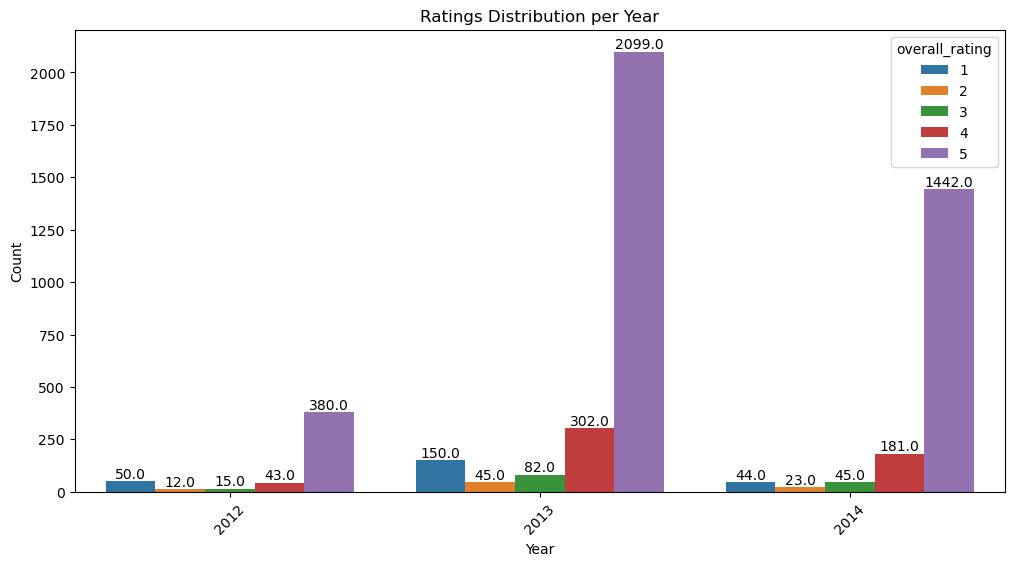

In [150]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Review_Year', hue='overall_rating', data=df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Ratings Distribution per Year')
plt.xticks(rotation=45) 

# Adding count labels on each bar
for p in ax.patches:
    height = p.get_height() if p.get_height() == p.get_height() else 0  # Handle NaN values
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [151]:
df.head()

,Reviewer_Name,overall_rating,Review_Text,Review_Year,Day_diff
1,0mie,5,"Purchased this for my device, it worked as adv...",2013,409
2,1K3,4,it works as expected. I should have sprung for...,2012,715
3,1m2,5,This think has worked out great.Had a diff. br...,2013,382
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013,513
5,2Cents!,5,It's mini storage. It doesn't do anything els...,2013,588


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction
from sklearn.naive_bayes import MultinomialNB

In [153]:
X = df['Review_Text']  # Input features (text reviews)
y = df['overall_rating']  # Target variable (ratings)

In [154]:
le = LabelEncoder()
y = le.fit_transform(y)

In [155]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## SVM

In [157]:
svm = SVC()

In [158]:
svcm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [159]:
y_pred = svcm.predict(X_test)

In [160]:
acc = accuracy_score(y_test, y_pred)
acc

0.8138351983723296

In [161]:
svcm_sigmoid = SVC(kernel = 'sigmoid')

In [162]:
svcm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [163]:
y_pred_sig = svcm_sigmoid.predict(X_test)

In [164]:
acc_sig = accuracy_score(y_test, y_pred_sig)
acc_sig

0.8128179043743642

In [165]:
svcm_rbf = SVC(kernel = 'rbf')

In [166]:
svcm_rbf.fit(X_train, y_train)

SVC()

In [167]:
y_pred_rbf = svcm_rbf.predict(X_test)

In [168]:
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_rbf

0.8046795523906409

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.43      0.52        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       110
           4       0.82      1.00      0.90       780

    accuracy                           0.81       983
   macro avg       0.30      0.28      0.28       983
weighted avg       0.69      0.81      0.74       983



In [170]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[ 23   0   0   0  31]
 [  6   0   1   0   7]
 [  0   0   0   0  25]
 [  2   0   0   0 108]
 [  3   0   0   0 777]]


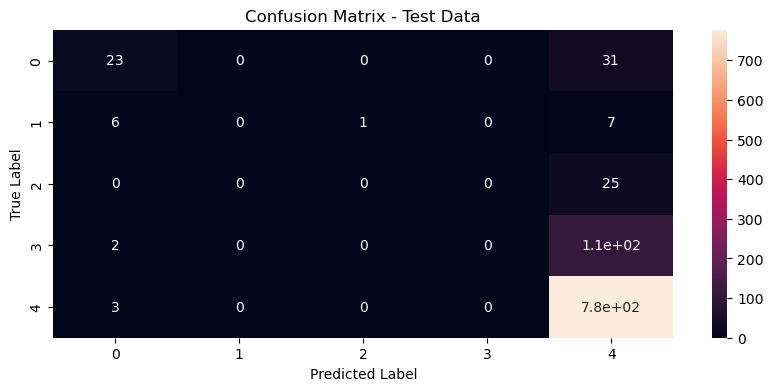

In [171]:
plt.figure(figsize = (10,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Hyperparameter tuning using GridSearchCV

In [172]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_

In [173]:
best_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [174]:
y_pred_best = best_svm.predict(X_test)

In [175]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.68      0.43      0.52        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       110
           4       0.82      1.00      0.90       780

    accuracy                           0.81       983
   macro avg       0.30      0.28      0.28       983
weighted avg       0.69      0.81      0.74       983



In [176]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_best))

Confusion Matrix:

[[ 23   0   0   0  31]
 [  6   0   1   0   7]
 [  0   0   0   0  25]
 [  2   0   0   0 108]
 [  3   0   0   0 777]]


### Hyperparameter tuning using RandomizedSearchCV

In [177]:
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)
best_random_svm = random_search.best_estimator_

In [178]:
best_random_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [179]:
y_pred_random = best_random_svm.predict(X_test)

In [180]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.68      0.43      0.52        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       110
           4       0.82      1.00      0.90       780

    accuracy                           0.81       983
   macro avg       0.30      0.28      0.28       983
weighted avg       0.69      0.81      0.74       983



In [181]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_random))

Confusion Matrix:

[[ 23   0   0   0  31]
 [  6   0   1   0   7]
 [  0   0   0   0  25]
 [  2   0   0   0 108]
 [  3   0   0   0 777]]


# Naive Bayes

In [182]:
bayes = naive_bayes.MultinomialNB()

In [183]:
bayes.fit(X_train, y_train)

MultinomialNB()

In [184]:
y_pred = bayes.predict(X_test)

In [185]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7995930824008138

In [186]:
print('Accuracy: {:.2f}%'. format(acc * 100))

Accuracy: 79.96%


In [187]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.13      0.23        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.33      0.01      0.02       110
           4       0.80      1.00      0.89       780

    accuracy                           0.80       983
   macro avg       0.40      0.23      0.23       983
weighted avg       0.72      0.80      0.72       983



In [188]:
bayes.score(X_test, y_test)

0.7995930824008138

In [205]:
naive_bayes = MultinomialNB()

In [195]:
# GridSearchCV
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_naive_bayes = grid_search.best_estimator_

In [196]:
best_naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [197]:
y_pred_best = best_naive_bayes.predict(X_test)

In [198]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.68      0.35      0.46        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       110
           4       0.82      0.99      0.90       780

    accuracy                           0.81       983
   macro avg       0.30      0.27      0.27       983
weighted avg       0.68      0.81      0.74       983



In [199]:
print("Confusion Matrix:/n")
print(confusion_matrix(y_test, y_pred_best))


Confusion Matrix:/n
[[ 19   1   0   1  33]
 [  2   0   1   0  11]
 [  0   0   0   0  25]
 [  3   0   0   0 107]
 [  4   0   0   0 776]]


In [200]:
# RandomizedSearchCV
param_dist = {
    'alpha': [0.1, 1.0, 10.0],
}
random_search = RandomizedSearchCV(naive_bayes, param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)
best_random_naive_bayes = random_search.best_estimator_

In [206]:
best_random_naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [204]:
y_pred_random = best_random_naive_bayes.predict(X_test)

In [202]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.68      0.35      0.46        54
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       110
           4       0.82      0.99      0.90       780

    accuracy                           0.81       983
   macro avg       0.30      0.27      0.27       983
weighted avg       0.68      0.81      0.74       983



In [208]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_random))

Confusion Matrix:

[[ 19   1   0   1  33]
 [  2   0   1   0  11]
 [  0   0   0   0  25]
 [  3   0   0   0 107]
 [  4   0   0   0 776]]
